# Bonus assignment - Pearl 110, Intelligent Interaction

For the bonus assignment you will implement a $k$-NN classifier and _play_ with it on a modified version of the Iris dataset. In the following, we provide the data set and some code to visualize it on a Cartesian plane. 

__When you finish the assignment, save the notebook with your implementations and deliver it via Canvas__

For the execution of the data generation and data generation sections, you need the python NumPy and Matplotlib libraries. 
You can look into basic tutorials to get started with NumPy and Matplotlib at the following links:
* [NumPy tutorial](https://numpy.org/devdocs/user/quickstart.html)
* [Matplotlib tutorial](https://matplotlib.org/stable/tutorials/index.html)

We use the array structure of NumPy. You can check out the [official manual]() of the array data structure, and [this tutorial](). _(these are suggestions - you may check other resources as well)

The following commands should be sufficient to install them.

In [222]:
!pip3 install matplotlib --break-system-packages
!pip3 install numpy --break-system-packages

### Authors of the assignment solution

__Make sure to include complete information about the group and group members.__

In [223]:
# Student names and numbers
# - Andrei Ursachi 3351912
# - Dominika Kapla 3406636
# Group: 

### Before you start - important note

In the cells above, the `!` at the beginning of each line indicates that the command has to be executed by the operating system terminal. This means that it will run `pip3 install` as it would be done from the operating system terminal.

In case you want to install other libraries to solve the assignment (remember that you are not allowed to use any libraries for Machine Learning), e.g. for improved plots, please add the `!pip3 install ...` command in the notebook, to facilitate the teacher when grading the assignment solutions.


### Data set

In this assignment, we use the famous [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) oof iris flower characteristics. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. For each sample, the original data set cointains 4 features, namely sepal length, sepal width, petal length and petal width.

We split the data set into a reference set of 75 samples (25 per class) and a test set also of 75 samples (25 per class). From the original data set (which contains samples with four features), we only select the last two features, which describe the petal length and petal width of the flowers, respectively.

The data set we work with is thus composed of:
* __reference_set__: the reference set of 75 samples \[25 samples per class, 3 classes (0, 1, 2 are the class labels) \];
* __referencel_labels__: the class labels of the 75 reference set samples;
* __test_set__: the test set of 75 samples \[25 samples per class, 3 classes (0, 1, 2 are the class labels) \];
* __test_labels__: the ground truth class labels of the 75 test set samples, to be used for performance evaluation only;

> Note 1: each sample is a vector of 2 feature values (2-dimensional vector)

> Note 2: the test samples are corrupted with some random noise

Load the data set and labels by running the cell below:

In [224]:
import numpy as np
reference_set = np.array([[1.4,0.2],[1.5,0.2],[1.7,0.4],[1.5,0.2],[1.5,0.1],[1.6,0.2],[1.1,0.1],[1.5,0.4],[1.4,0.3],[1.5,0.3],[1.5,0.4],[1.7,0.5],[1.6,0.2],[1.5,0.2],[1.6,0.2],[1.5,0.4],[1.4,0.2],[1.2,0.2],[1.4,0.1],[1.5,0.2],[1.3,0.3],[1.6,0.6],[1.4,0.3],[1.4,0.2],[1.4,0.2],[4.5,1.5],[4.,1.3],[4.5,1.3],[3.3,1.],[3.9,1.4],[4.2,1.5],[4.7,1.4],[4.4,1.4],[4.1,1.],[3.9,1.1],[4.,1.3],[4.7,1.2],[4.4,1.4],[5.,1.7],[3.5,1.],[3.7,1.],[5.1,1.6],[4.5,1.6],[4.4,1.3],[4.,1.3],[4.6,1.4],[3.3,1.],[4.2,1.2],[4.3,1.3],[4.1,1.3],[5.1,1.9],[5.6,1.8],[6.6,2.1],[6.3,1.8],[6.1,2.5],[5.3,1.9],[5.,2.],[5.3,2.3],[6.7,2.2],[5.,1.5],[4.9,2.],[4.9,1.8],[6.,1.8],[4.9,1.8],[5.8,1.6],[6.4,2.],[5.1,1.5],[6.1,2.3],[5.5,1.8],[5.4,2.1],[5.1,2.3],[5.9,2.3],[5.2,2.3],[5.2,2.],[5.1,1.8]])
reference_labels = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])
test_set = np.array([[1.13,0.17],[1.37,0.4],[1.27,0.47],[1.05,0.28],[1.46,0.24],[1.14,0.08],[1.47,-0.14],[1.36,0.38],[1.16,0.88],[1.81,0.13],[1.26,-0.01],[1.16,0.42],[2.12,0.14],[1.89,0.37],[1.53,-0.11],[1.36,-0.19],[1.14,0.55],[1.34,0.12],[1.42,-0.16],[0.87,0.59],[1.11,0.07],[1.02,-0.2],[1.8,0.54],[1.67,0.53],[1.22,-0.13],[4.59,1.54],[4.56,1.72],[4.87,1.48],[4.33,1.76],[4.26,0.94],[3.42,1.21],[3.87,0.98],[3.45,1.4],[4.69,1.44],[4.7,1.21],[4.56,2.25],[5.,1.27],[4.36,1.16],[5.36,1.06],[4.61,1.19],[3.78,0.99],[3.77,1.34],[4.44,1.53],[4.76,1.47],[3.94,1.55],[4.65,1.18],[3.87,1.39],[4.06,1.13],[4.72,1.3],[2.61,1.35],[6.15,2.16],[5.9,2.04],[5.99,2.42],[4.7,1.51],[5.58,2.15],[4.46,2.11],[5.98,1.67],[4.76,2.12],[5.56,1.83],[7.03,2.43],[6.,2.69],[6.63,1.88],[6.04,2.11],[4.99,1.83],[5.31,1.98],[6.51,1.9],[5.22,2.12],[5.82,1.84],[5.75,2.58],[4.55,1.82],[5.9,2.45],[5.25,2.35],[5.76,2.21],[4.51,1.59],[5.58,2.41]])
test_label = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])

### Data visualization
In the following cell we provide the code to plot the data points in the reference set and in the test set. Run the code to visualize the plots.

/var/folders/s8/c2kn3yk523g_j4wr1nhpt5dr0000gn/T/ipykernel_88859/883943527.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = pl.cm.get_cmap('Paired')


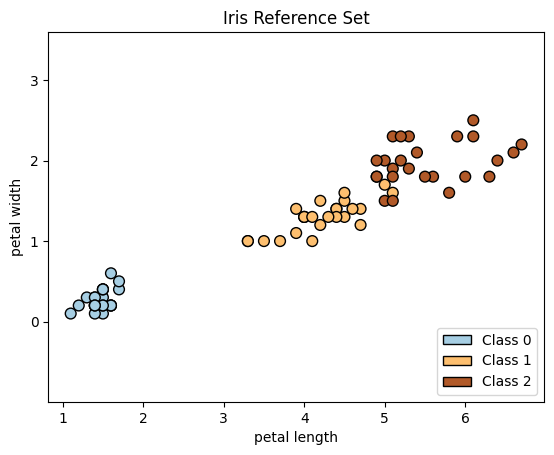

/var/folders/s8/c2kn3yk523g_j4wr1nhpt5dr0000gn/T/ipykernel_88859/883943527.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = pl.cm.get_cmap('Paired')


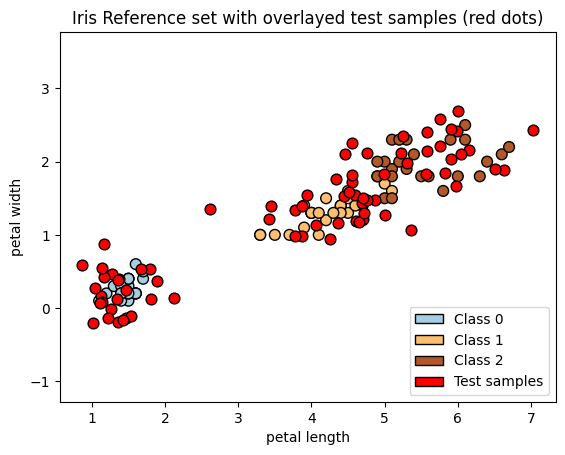

In [225]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# plot REFERENCE SET
pl.scatter(reference_set[:, 0], reference_set[:, 1], c=reference_labels, s=60, 
           marker='o', edgecolors='k', cmap=pl.cm.Paired)
pl.axis('equal')
pl.xlabel('petal length')
pl.ylabel('petal width')
pl.title('Iris Reference Set')
cm = pl.cm.get_cmap('Paired')
pl.legend(loc='lower right',
          handles=[mpatches.Patch(facecolor=cm(0.), edgecolor='k', label='Class 0'),
                  mpatches.Patch(facecolor=cm(0.5), edgecolor='k', label='Class 1'),
                  mpatches.Patch(facecolor=cm(1.), edgecolor='k', label='Class 2'),])
pl.show()
# end PLOT REFERENCE SET


# plot TEST SET
pl.scatter(reference_set[:, 0], reference_set[:, 1], c=reference_labels, s=60, 
           marker='o', edgecolors='k', cmap=pl.cm.Paired)
pl.scatter(test_set[:, 0], test_set[:, 1], c='red', s=60, 
           marker='o', edgecolors='k')
pl.axis('equal')
pl.xlabel('petal length')
pl.ylabel('petal width')
pl.title('Iris Reference set with overlayed test samples (red dots)')
cm = pl.cm.get_cmap('Paired')
pl.legend(loc='lower right',
          handles=[mpatches.Patch(facecolor=cm(0.), edgecolor='k', label='Class 0'),
                  mpatches.Patch(facecolor=cm(0.5), edgecolor='k', label='Class 1'),
                  mpatches.Patch(facecolor=cm(1.), edgecolor='k', label='Class 2'),
                  mpatches.Patch(facecolor='red', edgecolor='k', label='Test samples'),])
pl.show()
# end PLOT TEST SET

# Pearl bonus assignment

Using the dataset provided above, you are requested to:
* Implement a $k$-Nearest Neighbors classifier (__do not use libraries with available implementations - do it from scratch__).
* Using the provided test samples _test\_set_ and the corresponding ground truth labels _test\_labels_, compute the accuracy of classification for different values of $k$ (e.g. $k=1$, $k=3$, $k=5$ etc.).
* Plot the value of the accuracy as the value of $k$ changes. What are your observations on the performance?


Note: The data points of the reference set are contained in the variable `reference_set`, and the corresponding labels in the variable `reference_labels`. 

In [226]:
# implement here the kNN classifier

def knn(reference_set, ref_labels, test_sample, k):
    C = 0  # class
    # your code here
    x1, y1 = test_sample # x1 = length y1 = width | for the test element
    class_set = set(ref_labels) # we get the unique classes
    class_decider_dict = {cl: 0 for cl in class_set} # we create a dictionary for the recurrences of the class so we can get the most number of close classes
    distance_list = sorted([[np.sqrt((reference_set[i][0] - x1) ** 2 + (reference_set[i][1] - y1) ** 2), i] for i in range(len(reference_set))])[:k] # compute a list of the closest values from the test in the 2d plane with the index of the class in class_list and then sorting it and slicing to the first k elements
    for element in distance_list: # updating the class clossest elements to see which class is the most recurrences
        class_decider_dict[reference_labels[element[1]]] += 1
    C = max(class_decider_dict, key=class_decider_dict.get) # get the most recurrent class
    # end: your code here
    return C

    

In [227]:
# Classify the points in the 'test_set' and compute the accuracy of classification

# your code below:
#k = 1
#k = 3
#k = 5
def return_accuracy(k):
    nr_classes = 3 # len(set(reference_labels))
    # the k values are for how many neighbors we take in consideration
    predicted_class_list = [knn(reference_set, reference_labels, test_data, k) for test_data in test_set] # get all the predicted values for each value in the test sample
    confusion_matrix = np.zeros((nr_classes, nr_classes), dtype=int) # creates a 3x3 array (list with 3 lists) with zeros and uses checks for only allowing int

    # Populate the confusion matrix
    for ground_truth, predicted in zip(reference_labels , predicted_class_list): # zip creates an object which corelates 1 to 1 values in the 2 provided lists based on index
        confusion_matrix[ground_truth, predicted] += 1 # it updates the values in the array

    correct_predictions = np.trace(confusion_matrix) # sum all the values on the i=j diagonal
    total_prediction = np.sum(confusion_matrix) # sum all the values in the matrix
    accuracy = correct_predictions / total_prediction

    # Class Confusion Matrix
    #   1   2   3
    # 1 TP1 F   F 
    # 2 F   TP2 F
    # 3 F   F   TP3
    return accuracy

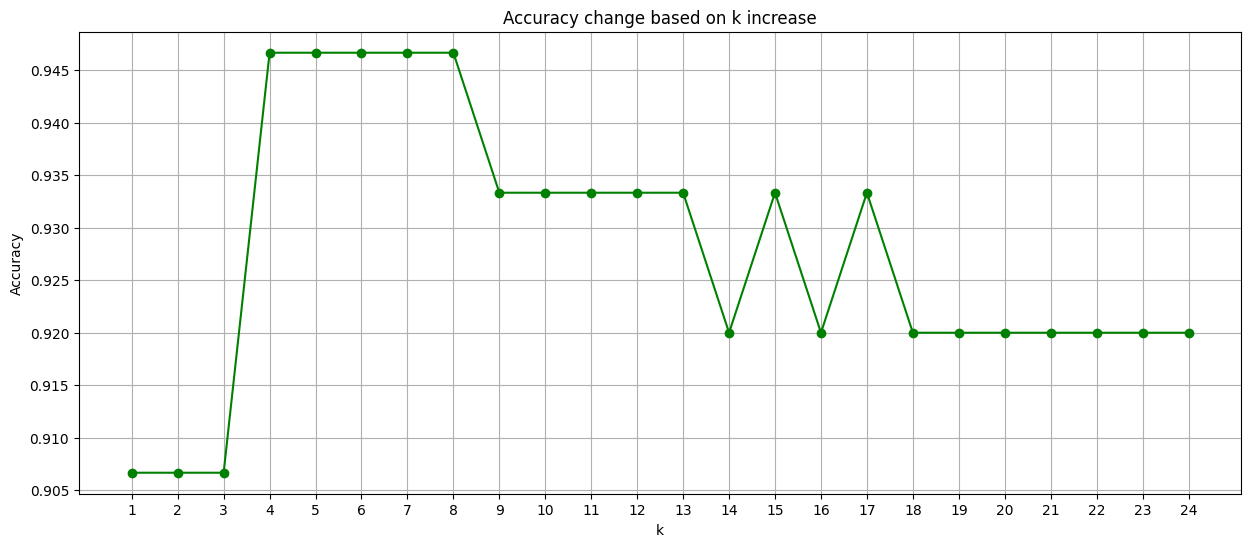

In [228]:
# Plot the accuracy, as the value of k increases
# your code below:
# plot CHANGE IN ACCURACY BASED ON K
k_range = range(1, 25)
accuracy_list = []

for k in k_range:
    accuracy_list.append(return_accuracy(k)) # we compute the accuracies for all the k in the range of values

pl.figure(figsize=(15, 6)) # the "resolution" of the graph
pl.plot(k_range, accuracy_list, marker='o', linestyle='-', color='g') # styles the plot and states the ranges for the x and y values
pl.title('Accuracy change based on k increase') # Gives the title of the plot
pl.xlabel('k')
pl.ylabel('Accuracy')
pl.xticks(k_range) # utilizes the x axis for the grid
pl.grid(True) # plots everything visible
pl.show() # draws the plot

# end PLOT CHANGE IN ACCURACY BASED ON K

### Final observations
Write below your own observations on the classification results:

->

In [229]:
# your observations below (use a comment #):
# The accuracy is highest when we use between 4 and 8 neighbours
# Overall the performance of the kNN classifier remains very high but after 49 it plumets
# To test this change the range of k to anything above 50 (off by one) and you will see
# Also for higher values for x axis, plese change the values in the figsize - first one is for x, 2nd for y
